## Exploratory Data Analysis (EDA) 

In this section, exploratory data analysis on the dataset will be performed. The target label or class in this analysis is the star-rating. Topics to be explored include the following: 

1. Descriptive statistics of the ratings for each department - get a summary of the star-rating distribution for each department 

2. Distribution of ratings within this dataset (% of total ratings for each class) 

3. Distribution of review length and average words per review 

4. Top words for each rating class (with word clouds) 

### Class Imbalance Issue 

To address the class inbalance issue, downsampling technique will be used to create a balanced dataset for modeling 

### Train-test Split 

The balanced data will be split into training set and testing set (80/20) for developing rating prediction models 

In [45]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

pd.options.display.max_rows = 4000

In [46]:
df = pd.read_pickle("clean_df.pkl")
df.head()

,overall,reviewText,department,clean1,tokens,clean2
0,5.0,No adverse comment.,Beverages,no adverse comment,"[no, adverse, comment]",no adverse comment
1,5.0,Gift for college student.,Beverages,gift for college student,"[gift, for, college, student]",gift college student
2,5.0,"If you like strong tea, this is for you. It mi...",Beverages,if you like strong tea this is for you it mi...,"[if, you, like, strong, tea, this, is, for, yo...",like strong tea might little strong
3,5.0,Love the tea. The flavor is way better than th...,Beverages,love the tea the flavor is way better than th...,"[love, the, tea, the, flavor, is, way, better,...",love tea flavor way well regular lipton black ...
4,5.0,I have searched everywhere until I browsed Ama...,Beverages,i have searched everywhere until i browsed ama...,"[i, have, searched, everywhere, until, i, brow...",search everywhere browse found tea lipton sell...


In [3]:
dept = df.groupby("department")
print(dept.describe())

                                     overall                                \
                                       count      mean       std  min  25%   
department                                                                   
Alcoholic Beverages                     18.0  3.555556  1.381484  1.0  3.0   
Beverages                           274625.0  4.425391  1.062758  1.0  4.0   
Breads & Bakery                       8461.0  4.225505  1.242173  1.0  4.0   
Breakfast Foods                      48437.0  4.475690  1.013765  1.0  4.0   
Candy & Chocolate                   114871.0  4.475072  1.049719  1.0  4.0   
Canned, Jarred & Packaged Foods      36306.0  4.333802  1.135881  1.0  4.0   
Condiments & Salad Dressings         10496.0  4.451982  1.075864  1.0  4.0   
Cooking & Baking                    209082.0  4.543117  0.981445  1.0  5.0   
Dairy, Cheese & Eggs                 14065.0  4.400071  1.098459  1.0  4.0   
Deli                                   583.0  4.283019  1.160861

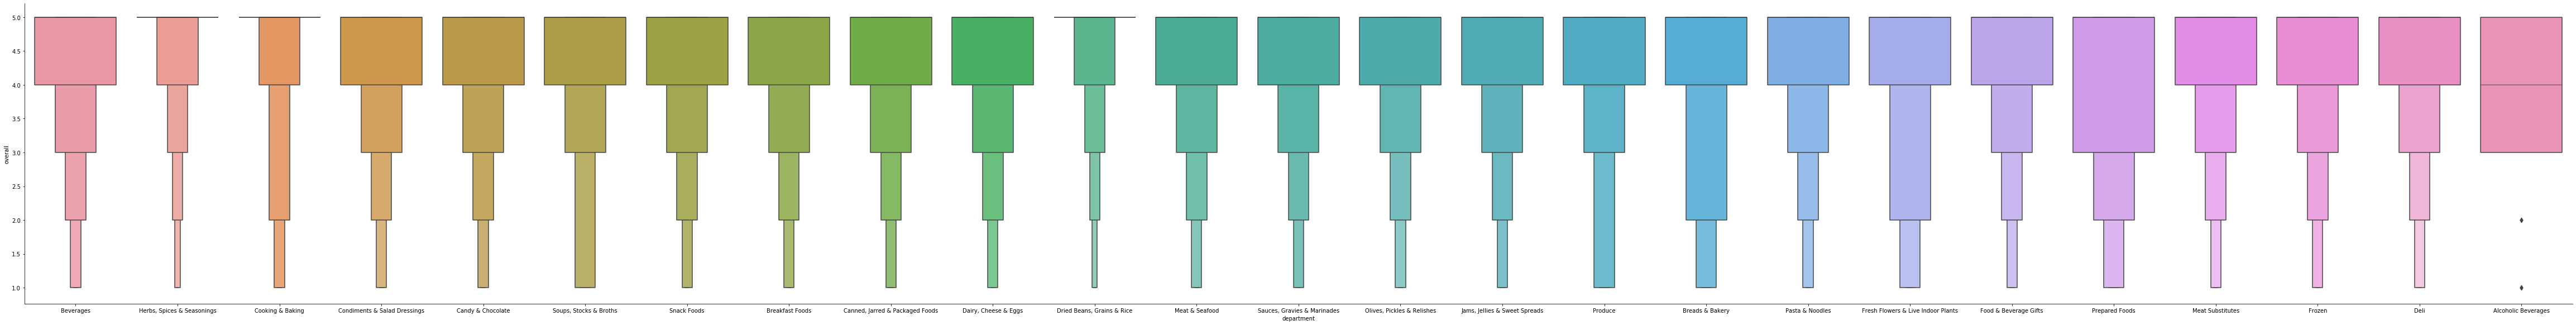

In [4]:
sns.catplot(y = "overall", x = "department", data = df.sort_values("overall", ascending = False), kind="boxen", height = 8, aspect = 8)
plt.show()

% of totoal ratings by class 
 1.0    0.042366
2.0    0.036019
3.0    0.069648
4.0    0.129533
5.0    0.722434
Name: overall, dtype: float64


/u/erdos/csga/szhen3/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


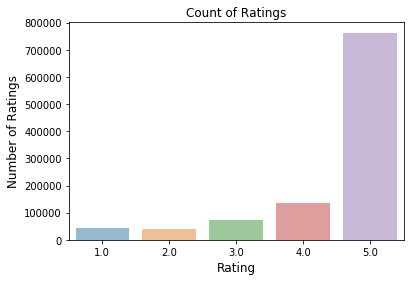

In [5]:
# % of total ratings for each class 
print("% of totoal ratings by class","\n",df['overall'].value_counts(normalize=True).sort_index())

#plot the number of ratings for each class 
rating_count  = df['overall'].value_counts().sort_index()
sns.barplot(rating_count.index, rating_count.values, alpha=0.5)
plt.title('Count of Ratings')
plt.ylabel('Number of Ratings', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.show()

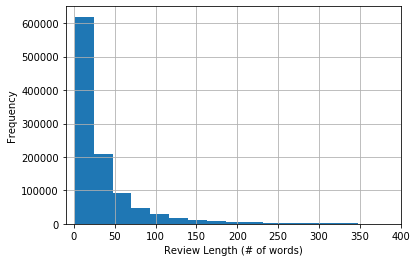

In [6]:
## Getting the number of words by splitting them by a space

# review_length = df['reviewText'].apply(lambda x: len(x.split(" ")))
review_length = df['tokens'].apply(lambda x: len(x))
review_length.hist(bins=100)
plt.xlabel('Review Length (# of words)')
plt.ylabel('Frequency')
plt.xlim([-10, 400])
plt.show()

In [7]:
print('On average, user reviews have', review_length.mean(), 'words')

On average, user reviews have 35.30797896469398 words


Top 20 words for rating: 1 
 not        29919
taste      24151
like       18404
product    11184
flavor     10584
no          8319
try         7645
good        7373
bad         6541
coffee      6027
tea         5475
buy         5350
well        5255
order       5159
bag         4833
eat         4820
time        4433
box         4422
really      4217
much        4025
dtype: int64


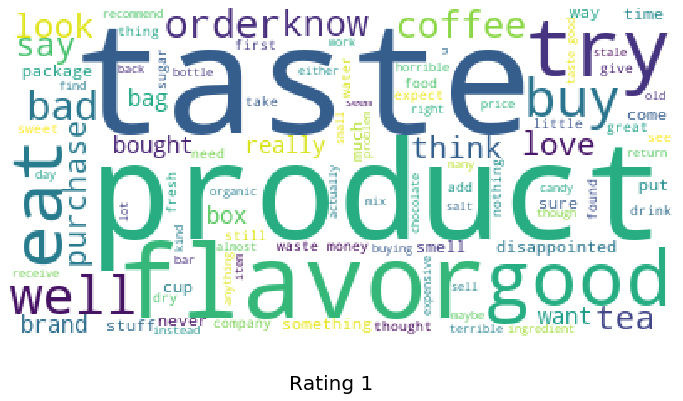

Top 20 words for rating: 2 
 not        28632
taste      21509
like       17506
flavor     13605
good        8689
product     7529
try         6815
coffee      6365
well        5977
tea         5607
much        5496
no          5255
really      4849
buy         4216
order       4130
bag         4023
love        3808
time        3656
eat         3527
sugar       3393
dtype: int64


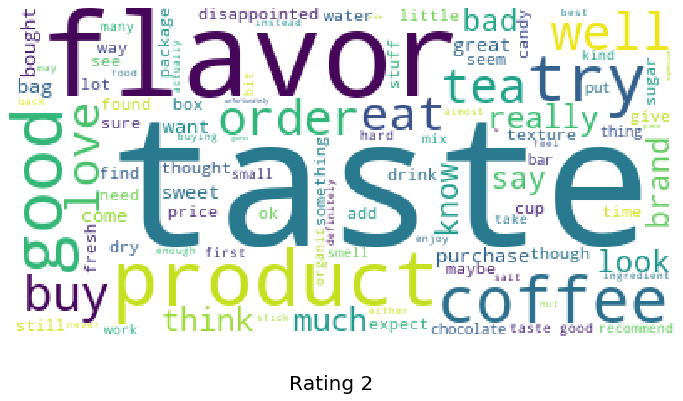

Top 20 words for rating: 3 
 not        47785
taste      34088
like       28397
flavor     24973
good       22760
well       12901
product    12258
coffee     11617
try        10893
much       10399
tea        10143
really      8898
ok          8295
great       8155
little      7479
price       7203
love        7178
no          7161
buy         6979
sugar       6561
dtype: int64


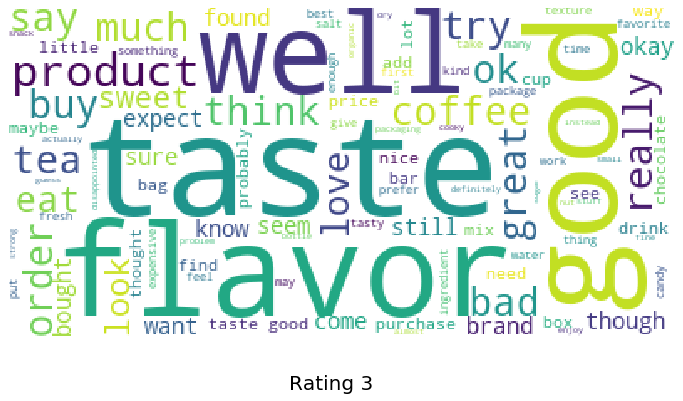

Top 20 words for rating: 4 
 good       64800
not        54519
like       50410
taste      49374
flavor     40940
great      27366
coffee     22816
well       22696
product    22128
tea        20506
try        17556
love       16802
little     16670
really     15900
price      15782
much       13800
nice       13393
add        13213
sugar      12728
bit        12608
dtype: int64


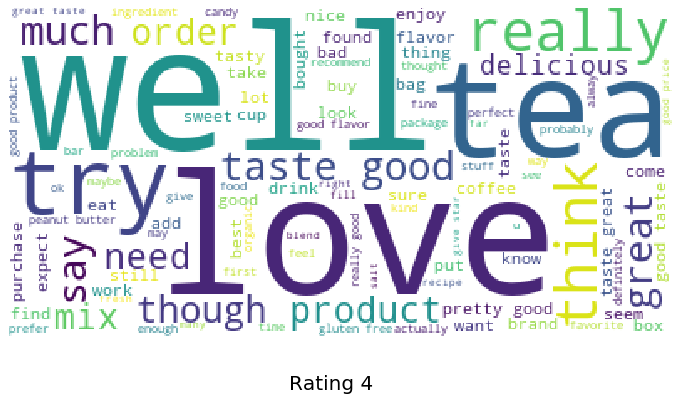

Top 20 words for rating: 5 
 great        225951
good         197861
love         190288
taste        189788
like         151355
flavor       146183
not          143668
product      109193
tea          104431
coffee        96438
well          86541
try           74964
price         69225
delicious     68094
best          66416
really        62434
time          61236
add           58075
no            55306
buy           54543
dtype: int64


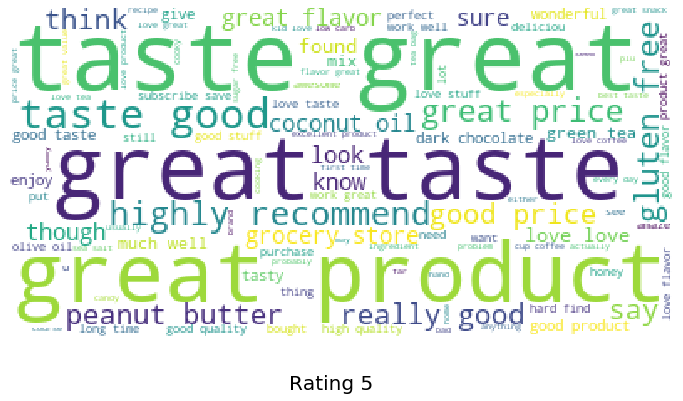

In [18]:
# Group all the reviews by rating and find out the top words for each class 
# Create wordclouds for top 100 words 
reviews_by_rating = df.groupby('overall').apply(lambda x: " ".join(r for r in x['clean2']))

top_100 = {}
for i, t in enumerate(reviews_by_rating):
    top_100[i+1] = pd.Series(t.split()).value_counts()[:20]
    print("Top 20 words for rating:", i+1, "\n", top_100[i+1])
    wordcloud = WordCloud(background_color='white', max_words=100).generate(str(t))
    fig = plt.figure(1, figsize=(12, 12))
    fig.suptitle(f"Rating {i+1}", fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()



In [47]:
df.drop(['reviewText', 'tokens', 'clean1'], axis=1, inplace=True)
df.head()

,overall,department,clean2
0,5.0,Beverages,no adverse comment
1,5.0,Beverages,gift college student
2,5.0,Beverages,like strong tea might little strong
3,5.0,Beverages,love tea flavor way well regular lipton black ...
4,5.0,Beverages,search everywhere browse found tea lipton sell...


### Uncomment the below code if want to treat this as a sentiment prediction problem


1    899625
0    156314
Name: class, dtype: int64


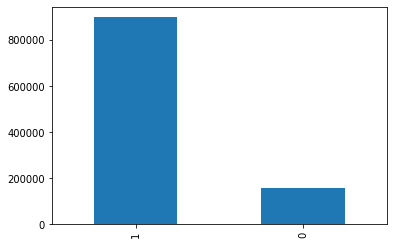

In [34]:
# # assign a positive sentiment to ratings greater than 3, negative sentimen to ratings less than that 

# df['class'] = np.where(df['overall'] > 3,1,0)
# print(df['class'].value_counts())
# df['class'].value_counts().plot.bar()
# plt.show()

# #resampling for two classes
# pos_idx = df[df['class'] == 1].index
# random_idx = np.random.choice(pos_idx, 156326, replace=False)
# pos_reviews = df.loc[random_idx]

### Downsample the dataset to create a balanced dataset 

In [48]:
## Use Downsampling to 50,000 reviews (10,000 reviewes per rating)

def balanced_subsample(y, size=None):
    subsample = []
    if size is None:
        n_smp = y.value_counts().min()
    else:
        n_smp = int(size / len(y.value_counts().index))
        
    for label in y.value_counts().index:
        samples = y[y == label].index.values
        index_range = range(samples.shape[0])
        indexes = np.random.choice(index_range, size=n_smp, replace=False)
        subsample += samples[indexes].tolist()
    return subsample

model_data_idx = balanced_subsample(df['overall'], size=100000)
model_data_df = df.loc[model_data_idx]
print(model_data_df['overall'].value_counts())
model_data_df = model_data_df.reset_index(drop=True)

4.0    20000
3.0    20000
1.0    20000
2.0    20000
5.0    20000
Name: overall, dtype: int64


In [49]:
model_data_df.to_pickle("model_data.pkl")

## Train-test Split

In [50]:
# use 80% of the data for training and 20% of the data for testing 

train, test = train_test_split(model_data_df, test_size=0.2, random_state=42, shuffle=True)

In [51]:
print(train.shape)
print(train['overall'].value_counts())
print(test.shape)
print(test['overall'].value_counts())

(80000, 3)
2.0    16022
1.0    16013
3.0    15998
4.0    15985
5.0    15982
Name: overall, dtype: int64
(20000, 3)
5.0    4018
4.0    4015
3.0    4002
1.0    3987
2.0    3978
Name: overall, dtype: int64


In [52]:
train.to_csv('train_data.csv', index=False)
test.to_csv('test_data.csv', index=False)